In [2]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
from jupyterthemes import jtplot

In [3]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5, 5)
mp.rcParams["figure.dpi"] = 100

In [15]:
def read_csv(name, save=False):
    filename = name + ".csv"
    t, Vin, Vout, Vnull = np.genfromtxt(filename, delimiter=",", skip_header=2).T
    t += abs(t.min())
    rate = len(Vin)/t.max()
    
    mp.plot(Vin, Vout, "y.")
    
    c = fft.fft(Vout)
    f = np.argmax(abs(c))/len(Vin)*rate
    
    mp.grid(True)
    mp.xlabel("time, s")
    mp.ylabel("amplitude, V")
    mp.title(name + ", %i Hz"%f)
    
    if save:
        mp.savefig(name + ".png", dpi=300, bbox_inches="tight")
        
    mp.show()

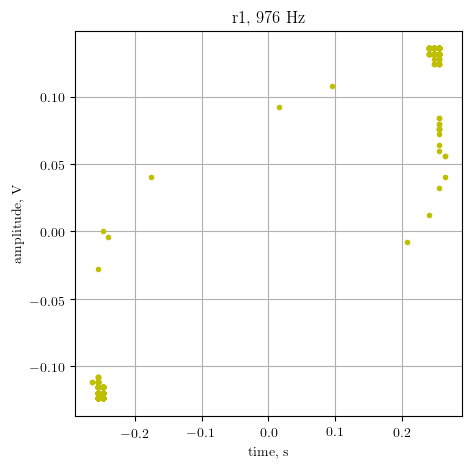

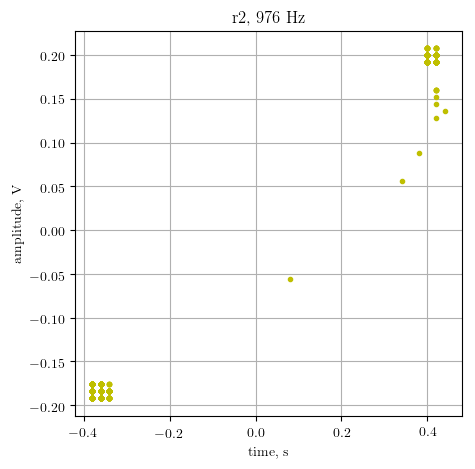

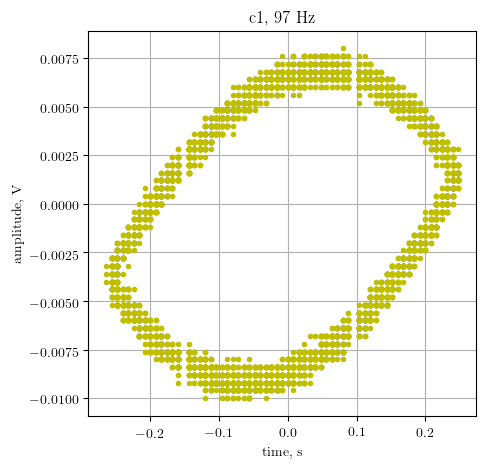

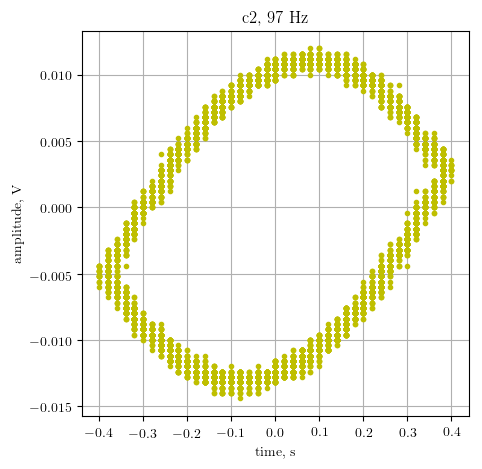

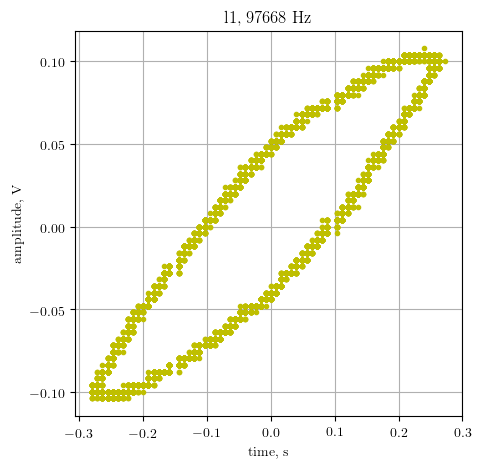

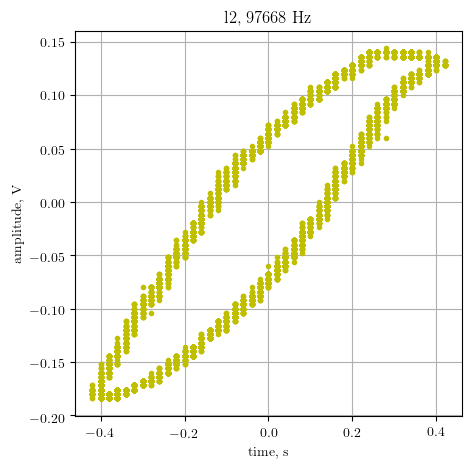

In [16]:
files = ["r1", "r2", "c1", "c2", "l1", "l2"]
for n in files:
    read_csv(n, True)